# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.153384e+01     1.237749e+01
 * time: 0.0030689239501953125
     1     6.301644e+01     9.810715e+00
 * time: 0.00884103775024414
     2     5.709751e+01     1.252740e+01
 * time: 0.02200007438659668
     3     4.170327e+01     8.262066e+00
 * time: 0.03999209403991699
     4     3.175594e+01     7.676535e+00
 * time: 0.05798006057739258
     5     2.867563e+01     6.432623e+00
 * time: 0.12732601165771484
     6     1.361217e+01     2.691065e+00
 * time: 0.1428689956665039
     7     9.155467e+00     1.759853e+00
 * time: 0.15593314170837402
     8     8.104955e+00     2.105596e+00
 * time: 0.16919207572937012
     9     7.374386e+00     2.275724e+00
 * time: 0.18238306045532227
    10     6.601630e+00     2.014961e+00
 * time: 0.1954030990600586
    11     6.090674e+00     1.466125e+00
 * time: 0.2086939811706543
    12     5.837393e+00     2.341402e+00
 * time: 0.21949100494384766
    13     5.545598e+00     1.114157e+00
 * time: 

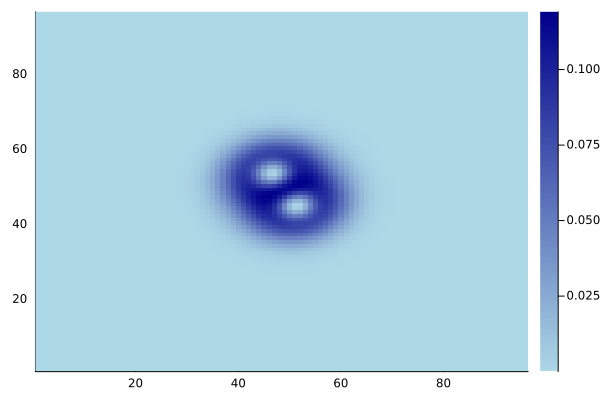

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)